           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

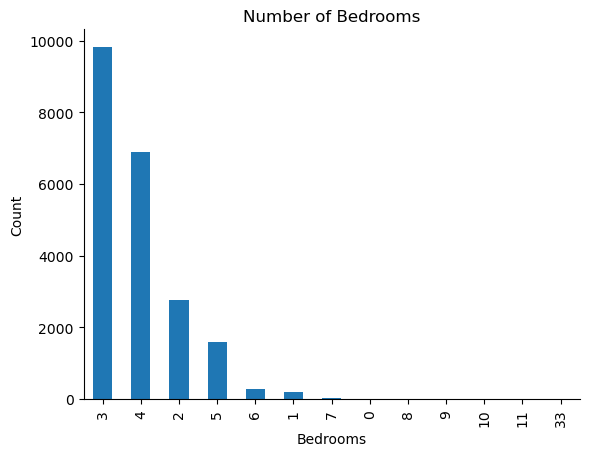

<Figure size 1000x1000 with 0 Axes>

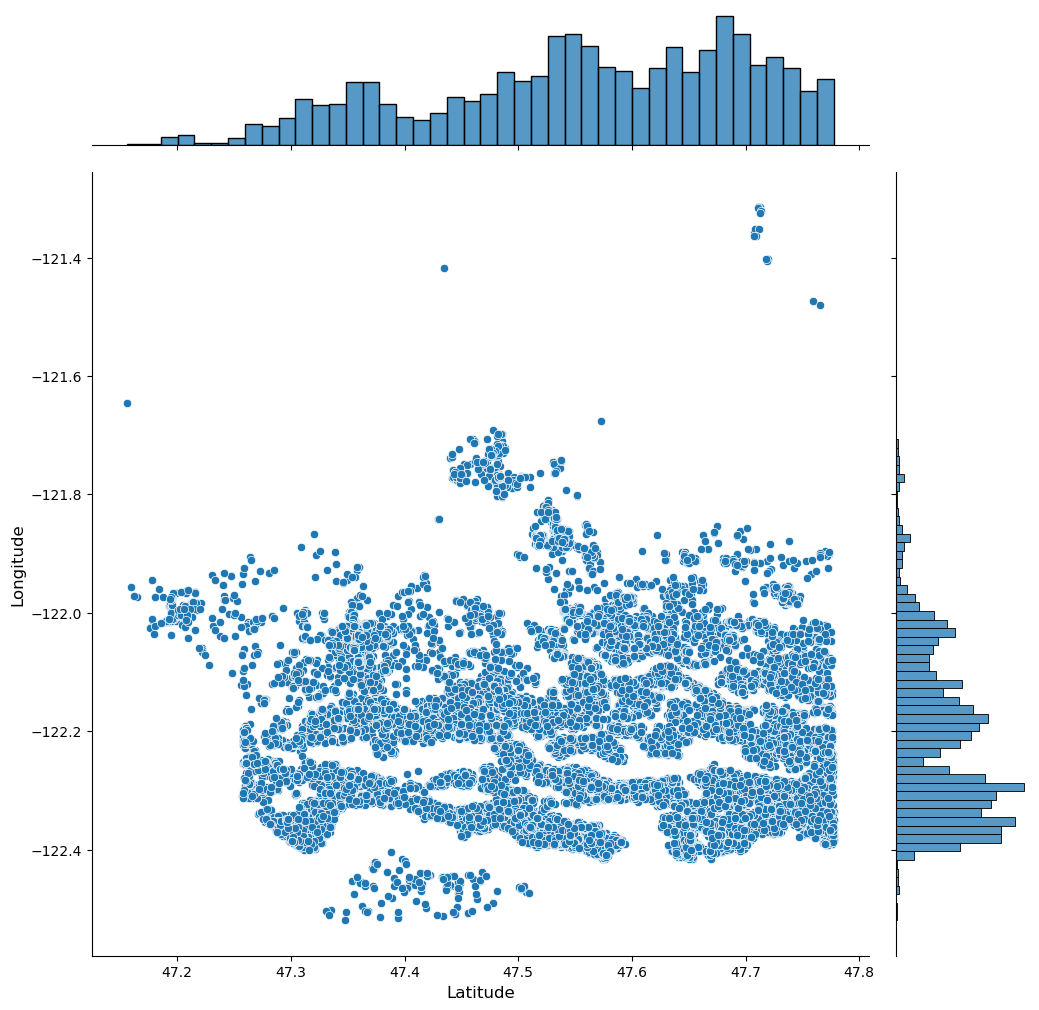

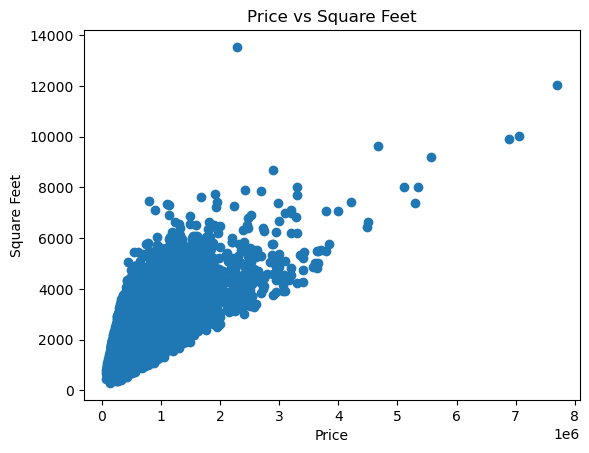

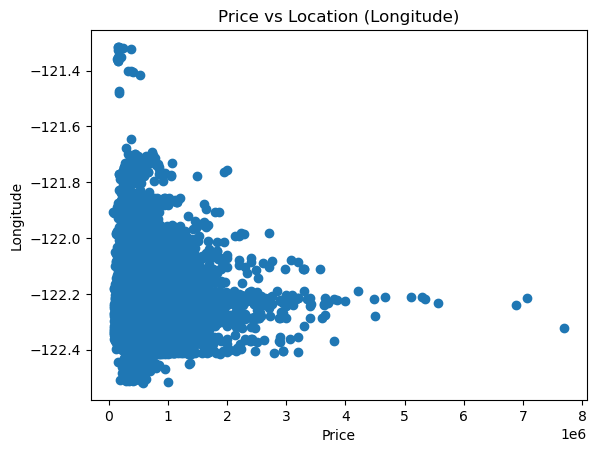

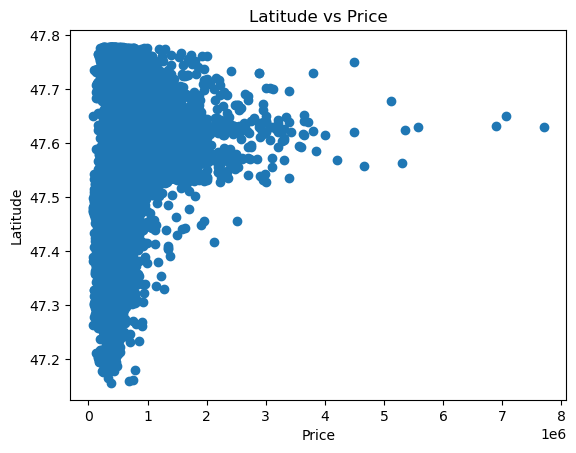

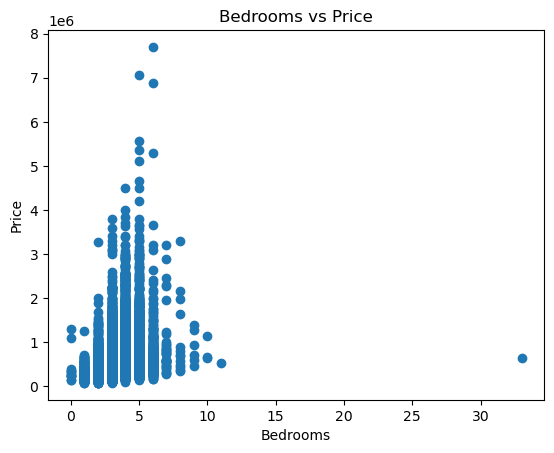

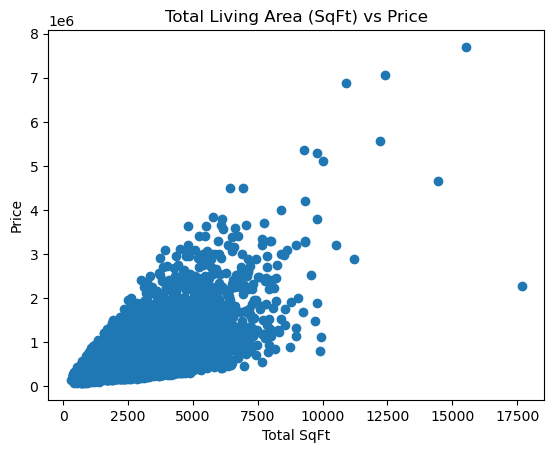

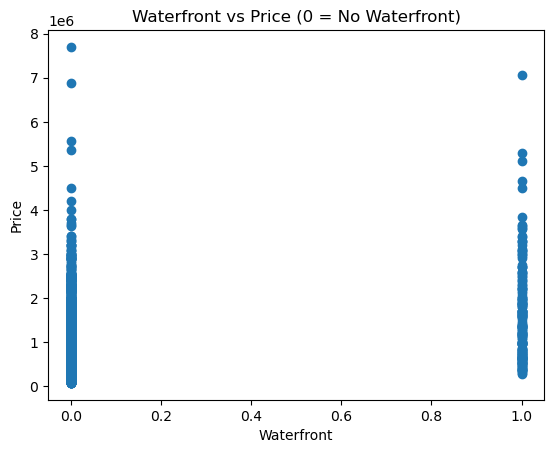

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

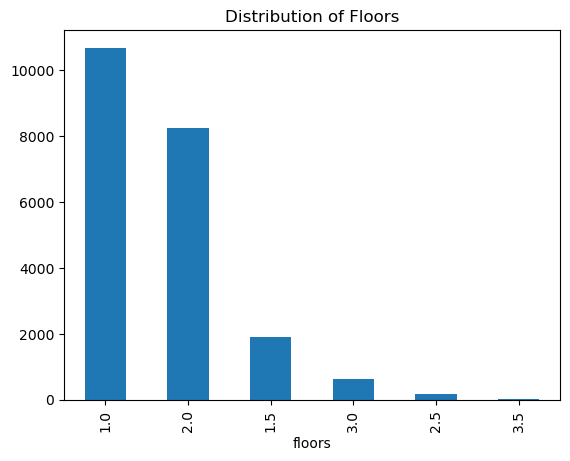

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Load data
data = pd.read_csv("kc_house_data.csv")

# Display first few rows
print(data.head())

# Data description
print(data.describe())

# Plot number of bedrooms
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine()
plt.show()

# Latitude vs Longitude jointplot
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

# Scatter plots for various relationships
plt.scatter(data.price, data.sqft_living)
plt.title("Price vs Square Feet")
plt.xlabel("Price")
plt.ylabel("Square Feet")
plt.show()

plt.scatter(data.price, data.long)
plt.title("Price vs Location (Longitude)")
plt.xlabel("Price")
plt.ylabel("Longitude")
plt.show()

plt.scatter(data.price, data.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")
plt.show()

plt.scatter(data.bedrooms, data.price)
plt.title("Bedrooms vs Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

plt.scatter((data['sqft_living'] + data['sqft_basement']), data['price'])
plt.title("Total Living Area (SqFt) vs Price")
plt.xlabel("Total SqFt")
plt.ylabel("Price")
plt.show()

plt.scatter(data.waterfront, data.price)
plt.title("Waterfront vs Price (0 = No Waterfront)")
plt.xlabel("Waterfront")
plt.ylabel("Price")
plt.show()

# Drop irrelevant columns
train1 = data.drop(['id', 'price'], axis=1)

# Check for NaN values and drop if necessary
if train1.isnull().values.any():
    train1 = train1.dropna()

# Plot distribution of floors
data.floors.value_counts().plot(kind='bar')
plt.title("Distribution of Floors")
plt.xlabel